In [1]:
from tvDatafeed import TvDatafeed, Interval
import time
import os
from dotenv import load_dotenv
import pandas_ta as ta
import pandas as pd
import numpy as np
import logging
import scraping


# ปิดการแจ้งเตือนจาก tvDatafeed โดยตั้งค่าให้แสดงเฉพาะ Error ระดับ CRITICAL เท่านั้น
logging.getLogger('tvDatafeed').setLevel(logging.CRITICAL)

load_dotenv()

username = os.getenv('TV_USERNAME')
password = os.getenv('TV_PASSWORD')

tv = TvDatafeed(username, password)

In [2]:
def fetch_tvdatafeed(symbol):
    try:
        exch, sym = symbol.split(':')
    except ValueError:
        print(f"❌ รูปแบบสัญลักษณ์ไม่ถูกต้อง: {symbol}")
        return None
    
    attempt = 1
    while attempt == 1: # วนลูปไม่จำกัดจนกว่าจะ return
        try:
            data = tv.get_hist(symbol=sym, exchange=exch, interval=Interval.in_daily, n_bars=1100)
            
            if data is not None and not data.empty:
                # ถ้าได้ข้อมูลแล้ว ให้คืนค่าทันทีและออกจากลูป while
                attempt +=1
                return data
            else:
                # ถ้าข้อมูลเป็นค่าว่าง (อาจจะเพราะรหัสผิด หรือไม่มีการซื้อขาย) 
                # ในกรณีนี้ "วนไปก็ไม่มีข้อมูล" แนะนำให้ข้ามไปเลยเพื่อไม่ให้ลูปค้างตลอดกาล
                # print(f"⚠️ {symbol} ไม่พบข้อมูลในระบบ (Ticker อาจผิด) - กำลังข้าม...")
                return None
                
        except Exception as e:
            # กรณี Error จากการเชื่อมต่อ ให้รอแล้วลองใหม่
            # print(f"⏳ {symbol} เกิดข้อผิดพลาด: {e} - กำลังลองใหม่ครั้งที่ {attempt}...")
            time.sleep(10) # รอ 10 วินาทีก่อนลองใหม่
            # attempt += 1
            
asset_sector = {
    
    "Thai": "SET:SET",
    "China": "HSI:HSI",
    "USA": "AMEX:SPY",
    "GOLD": "OANDA:XAUUSD"
}

# sector_allocation = {
    
#     "Technology_Thai": "SET:TECH",
#     "Financials_Thai": "SET:BANK",
#     "Communication_Thai": "SET:ICT",
#     "Health Care_Thai": "SET:HELTH",
#     "Energy_Thai": "SET:ENERG",
#     "Consumer Staples_Thai": "SET:FOOD",
#     "Consumer Disc._Thai": "SET:COMM",
#     "Industrials_Thai": "SET:INDUS",


#     "Technology_China": "SSE:000991",
#     "Financials_China": "SSE:000992",
#     "Communication_China": "SSE:000915",
#     "Health Care_China": "SSE:000993",
#     "Energy_China": "SSE:000986",
#     "Consumer Staples_China": "SSE:000990",
#     "Consumer Disc._China": "SSE:000989",
#     "Industrials_China": "SSE:000988",


#     "Technology_USA": "AMEX:XLK",
#     "Financials_USA": "AMEX:XLF",
#     "Communication_USA": "AMEX:XLC",
#     "Health Care_USA": "AMEX:XLV",
#     "Energy_USA": "AMEX:XLE",
#     "Consumer Staples_USA": "AMEX:XLP",
#     "Consumer Disc._USA": "AMEX:XLY",
#     "Industrials_USA": "AMEX:XLI",

#     "GOLD": "OANDA:XAUUSD"
    
# }

sector_allocation = {
    # --- THAILAND (SET Index) ---
    "Technology_Thai": "SET:TECH",
    "Financials_Thai": "SET:FINCIAL",
    "HealthCare_Thai": "SET:HELTH",
    "Energy_Thai": "SET:ENERG",
    "Consumer Staples_Thai": "SET:AGRO",
    "Consumer Discretionary_Thai": "SET:CONSUMP",
    "Industrials_Thai": "SET:INDUS",
    "Property_Thai": "SET:PROPCON",
    "Services_Thai": "SET:SERVICE",

    # --- USA (S&P 500 SPDR ) ---
    "Technology_USA": "SP:S5INFT",
    "Financials_USA": "SP:SPF",
    "HealthCare_USA": "SP:S5HLTH",
    "Energy_USA": "SP:SPN",
    "Consumer Staples_USA": "SP:S5CONS",
    "Consumer Discretionary_USA": "SP:S5COND",
    "Industrials_USA": "SP:S5INDU",
    "Materials_USA": "SP:S5MATR",
    "Communication_USA": "SP:S5TELS",
    "Utilities_USA": "SP:S5UTIL",
    "Real Estate_USA": "SP:S5REAS",

    # --- CHINA (CSI 300 Sector Indices) ---
    "Technology_China": "HSI:HSCI.IT",
    "Financials_China": "HSI:HSCI.F",
    "HealthCare_China": "HSI:HSCI.H",
    "Energy_China": "HSI:HSCI.E",
    "Consumer Staples_China": "HSI:HSCI.S",
    "Consumer Discretionary_China": "HSI:HSCI.C",
    "Telecommunications_China": "HSI:HSCI.T",
    "Industrials_China": "HSI:HSCI.I",
    "Materials_China": "HSI:HSCI.M",
    "Conglomerates_China": "HSI:HSCI.C",
    "Utilities_China": "HSI:HSCI.U",
    "Properties_Construction_China": "HSI:HSCI.P",

    # --- ALTERNATIVE ASSETS ---
    "GOLD": "OANDA:XAUUSD",
    "BITCOIN": "BINANCE:BTCUSDT"
}

stock = {
    
    "Thai": {
        
        "Technology_Thai": ["SET:CCET","SET:DELTA","SET:HANA","SET:KCE","SET:METCO","SET:SMT","SET:SVI","SET:TEAM","SET:3BBIF","SET:ADVANC","SET:AIT","SET:ALT","SET:AMR","SET:BBIK","SET:BLISS","SET:DIF","SET:DITTO","SET:DTCENT","SET:FORTH","SET:GABLE","SET:HUMAN","SET:ICN","SET:ILINK","SET:INET","SET:INSET","SET:ITEL","SET:JAS","SET:JMART","SET:JTS","SET:MFEC","SET:MSC","SET:PT","SET:ROCTEC","SET:SAMART","SET:SAMTEL","SET:SDC","SET:SIS","SET:SKY","SET:SPREME","SET:SVOA","SET:SYMC","SET:SYNEX","SET:THCOM","SET:TKC","SET:TRUE","SET:TWZ","SET:XYZ"],
        "Financials_Thai": ["SET:BAY", "SET:BBL", "SET:CIMBT", "SET:KBANK", "SET:KKP", "SET:KTB", "SET:LHFG", "SET:SCB", "SET:TCAP", "SET:TISCO", "SET:TTB", "SET:AEONTS", "SET:AMANAH", "SET:ASAP", "SET:ASK", "SET:ASP", "SET:BAM", "SET:BYD", "SET:CGH", "SET:CHASE", "SET:CHAYO", "SET:EAST", "SET:FNS", "SET:FSX", "SET:GBX", "SET:HENG", "SET:IFS", "SET:JMT", "SET:KCAR", "SET:KGI", "SET:KTC", "SET:MFC", "SET:MICRO", "SET:ML", "SET:MST", "SET:MTC", "SET:NCAP", "SET:PL", "SET:S11", "SET:SAK", "SET:SAWAD", "SET:SCAP", "SET:SGC", "SET:STARM", "SET:TH", "SET:THANI", "SET:TIDLOR", "SET:TK", "SET:TNITY", "SET:TNL", "SET:TURBO", "SET:UOBKH", "SET:XPG", "SET:AYUD", "SET:BKIH", "SET:BLA", "SET:BUI", "SET:CHARAN", "SET:INSURE", "SET:KWI", "SET:MTI", "SET:NKI", "SET:TGH", "SET:THRE", "SET:THREL", "SET:TIPH", "SET:TLI", "SET:TQM", "SET:TSI", "SET:TVH"],
        "HealthCare_Thai": ["SET:AHC", "SET:BCH", "SET:BDMS", "SET:BH", "SET:BKGI", "SET:CHG", "SET:CMR", "SET:EKH", "SET:KDH", "SET:KLINIQ", "SET:LPH", "SET:M-CHAI", "SET:MASTER", "SET:MEDEZE", "SET:NEW", "SET:NKT", "SET:NTV", "SET:PHG", "SET:PR9", "SET:PRINC", "SET:RAM", "SET:RJH", "SET:RPH", "SET:SAFE", "SET:SKR", "SET:THG", "SET:VIBHA", "SET:VIH", "SET:WPH"],
        "Energy_Thai": ["SET:PTT", "SET:PTTEP", "SET:GULF", "SET:OR", "SET:GPSC", "SET:TOP", "SET:EGCO", "SET:RATCH", "SET:BCP", "SET:BANPU", "SET:EA", "SET:BGRIM", "SET:IRPC", "SET:TTW", "SET:SPRC", "SET:BCPG", "SET:CKP", "SET:GUNKUL", "SET:ACE", "SET:TPIPP", "SET:WHAUP", "SET:BPP", "SET:BAFS", "SET:EASTW", "SET:EGATIF", "SET:BRRGIF", "SET:ETC", "SET:SSP", "SET:SUPER", "SET:TSE", "SET:AGE", "SET:BGRIM", "SET:LANNA", "SET:SUSCO", "SET:AI", "SET:AIE", "SET:EP", "SET:TGE", "SET:BBGI", "SET:UAC", "SET:MDX", "SET:SGP", "SET:TAKUNI", "SET:SKE", "SET:RPC", "SET:ACC", "SET:GREEN", "SET:ATLAS", "SET:TCC", "SET:TPP"],
        "Consumer Staples_Thai": ["SET:CPALL", "SET:CPF", "SET:MINT", "SET:TU", "SET:BTG", "SET:CBG", "SET:OSP", "SET:ICHI", "SET:SAPPE", "SET:SNNP", "SET:NSL", "SET:GFPT", "SET:TFG", "SET:STA", "SET:NER", "SET:TVO", "SET:MALEE", "SET:TIPCO", "SET:PLUS", "SET:RBF", "SET:AU", "SET:M", "SET:ZEN", "SET:SNP", "SET:SORKON", "SET:PB", "SET:KSL", "SET:KTIS", "SET:BRR", "SET:AAI", "SET:ASIAN", "SET:CH", "SET:SUN", "SET:APURE", "SET:XO", "SET:COCOCO"],
        "Consumer Discretionary_Thai": ["SET:AURA", "SET:SABINA", "SET:KAMART", "SET:STGT", "SET:TOG", "SET:KISS", "SET:DDD", "SET:BEAUTY", "SET:WACOAL", "SET:S&J", "SET:MODERN", "SET:TCMC", "SET:KYE", "SET:MOONG", "SET:OCC", "SET:PG", "SET:CPL", "SET:NC", "SET:PAF", "SET:TR", "SET:UPF", "SET:ROCK", "SET:OGC", "SET:TMD", "SET:PDJ", "SET:FANCY"],
        "Industrials_Thai": ["SET:PTTGC", "SET:IVL", "SET:SCGP", "SET:VNG", "SET:SAT", "SET:STANLY", "SET:AH", "SET:IRC", "SET:SNC", "SET:BGC", "SET:SFLEX", "SET:AJ", "SET:PTL", "SET:SMPC", "SET:MCS", "SET:TSTH", "SET:GGC", "SET:TMT", "SET:LHK", "SET:UTP", "SET:HFT", "SET:IHL", "SET:PCSGH", "SET:ASEFA", "SET:ALLA", "SET:AKR", "SET:PCC", "SET:SMIT", "SET:PERM", "SET:INOX", "SET:GJS", "SET:MILL", "SET:TGPRO"],
        "Property_Thai": ["SET:SCC", "SET:CPN", "SET:LH", "SET:WHA", "SET:AWC", "SET:AMATA", "SET:AP", "SET:SIRI", "SET:SPALI", "SET:QH", "SET:ORI", "SET:SC", "SET:S", "SET:ANAN", "SET:LPN", "SET:PSH", "SET:TPIPL", "SET:TASCO", "SET:DCC", "SET:TOA", "SET:CK", "SET:STECON", "SET:STECH", "SET:ITD", "SET:UNIQ", "SET:BLAND", "SET:DOHOME", "SET:GLOBAL"],
        "Services_Thai": ["SET:AOT", "SET:BEM", "SET:BTS", "SET:BDMS", "SET:BH", "SET:BCH", "SET:CHG", "SET:PR9", "SET:CPAXT", "SET:CRC", "SET:HMPRO", "SET:COM7", "SET:MEGA", "SET:CENTEL", "SET:ERW", "SET:VGI", "SET:PLANB", "SET:BEC", "SET:MAJOR", "SET:SISB", "SET:SJWD", "SET:AAV", "SET:BA"]
    },
    
    "USA": {
        
        "Technology_USA": ["NASDAQ:AAPL", "NASDAQ:MSFT", "NASDAQ:NVDA", "NASDAQ:AVGO", "NYSE:ORCL", "NYSE:CRM", "NASDAQ:ADBE", "NASDAQ:AMD", "NASDAQ:CSCO", "NYSE:ACN", "NASDAQ:QCOM", "NASDAQ:TXN", "NASDAQ:INTU", "NYSE:NOW", "NASDAQ:AMAT", "NYSE:IBM", "NASDAQ:MU", "NASDAQ:LRCX", "NASDAQ:PANW", "NASDAQ:ADI", "NASDAQ:KLAC", "NASDAQ:SNPS", "NASDAQ:CDNS", "NYSE:ANET", "NYSE:APH", "NYSE:MSI", "NASDAQ:ROP", "NASDAQ:ADSK", "NASDAQ:MCHP", "NYSE:TEL", "NYSE:HPQ", "NASDAQ:FTNT", "NYSE:IT", "NYSE:TDY", "NYSE:GLW", "NYSE:KEYS", "NASDAQ:STX", "NYSE:HPE", "NASDAQ:NTAP", "NASDAQ:FSLR", "NASDAQ:TRMB", "NASDAQ:ZBRA", "NASDAQ:ENPH", "NASDAQ:CDW", "NASDAQ:WDC", "NYSE:TYL", "NASDAQ:AKAM", "NASDAQ:SWKS", "NASDAQ:GEN", "NASDAQ:TER", "NASDAQ:FFIV", "NYSE:FICO", "NASDAQ:PTC", "NASDAQ:VRSN" ],
        "Financials_USA": ["NYSE:BRK.B", "NYSE:JPM", "NYSE:V", "NYSE:MA", "NYSE:BAC", "NYSE:MS", "NYSE:GS", "NYSE:WFC", "NYSE:AXP", "NYSE:C", "NYSE:BLK", "NYSE:SCHW", "NYSE:SPGI", "NEWCONNECT:MMC", "NYSE:CB", "NYSE:PGR", "NYSE:ICE", "NYSE:AON", "NYSE:MCO", "NYSE:MSCI", "NYSE:BX", "NYSE:KKR", "NYSE:APO", "NASDAQ:CME", "NASDAQ:PYPL", "NYSE:FIS", "NYSE:GPN", "NYSE:MET", "NYSE:TRV", "NYSE:PRU", "NYSE:COF", "NYSE:AFL", "NYSE:BK", "NYSE:STT", "NYSE:HIG", "NYSE:ALL", "NYSE:AMP", "NYSE:AJG", "NYSE:BRO", "NYSE:FDS", "NYSE:BR", "NYSE:SYF", "NYSE:RJF", "NYSE:MTB", "NYSE:CFG", "NYSE:KEY", "NYSE:RF", "NYSE:CMA", "NYSE:L", "NYSE:AIZ", "NYSE:GL", "NYSE:WRB", "NYSE:EG", "NASDAQ:PFG", "NYSE:IVZ", "NYSE:BEN", "LSE:DFS", "NASDAQ:NDAQ", "NASDAQ:MKTX", "NASDAQ:TROW", "NASDAQ:FITB", "NASDAQ:HBAN", "NASDAQ:ZION", "NASDAQ:NTRS", "NASDAQ:JKHY", "NASDAQ:PAYX", "NASDAQ:LPLA", "NASDAQ:WTW", "NASDAQ:ACGL", "NASDAQ:CINF"],
        "HealthCare_USA": ["NYSE:LLY", "NYSE:UNH", "NYSE:JNJ", "NYSE:ABBV", "NYSE:MRK", "NYSE:TMO", "NYSE:ABT", "NYSE:DHR", "NYSE:PFE", "NASDAQ:AMGN", "NASDAQ:ISRG", "NYSE:SYK", "NYSE:ELV", "NASDAQ:GILD", "NYSE:BMY", "NASDAQ:VRTX", "NASDAQ:REGN", "NYSE:CI", "NYSE:HUM", "NYSE:CVS", "NYSE:BDX", "NYSE:MDT", "NYSE:BSX", "NYSE:ZTS", "NYSE:HCA", "NYSE:COR", "NYSE:EW", "NYSE:MCK", "NASDAQ:IDXX", "NASDAQ:DXCM", "NYSE:IQV", "NYSE:A", "NASDAQ:BIIB", "NYSE:RMD", "NASDAQ:GEHC", "NYSE:MTD", "NYSE:MOH", "NYSE:BAX", "NYSE:STE", "NASDAQ:VTRS", "NYSE:WAT", "NASDAQ:ALGN", "NYSE:WST", "NASDAQ:COO", "NASDAQ:XRAY", "NYSE:RVTY", "NYSE:DVA", "NASDAQ:HSIC", "NYSE:TFX", "NYSE:ZBH", "NASDAQ:INCY", "NASDAQ:TECH", "NASDAQ:MRNA", "NYSE:CRL", "NASDAQ:PODD", "NASDAQ:ILMN"],
        "Energy_USA": ["NYSE:XOM", "NYSE:CVX", "NYSE:COP", "NYSE:SLB", "NYSE:EOG", "NYSE:MPC", "NYSE:PSX", "NYSE:VLO", "NYSE:OXY", "NYSE:WMB", "NYSE:HAL", "NASDAQ:BKR", "NYSE:OKE", "NYSE:KMI", "NYSE:TRGP", "UPCOM:HES", "NYSE:DVN", "NYSE:CTRA", "NASDAQ:FANG", "LSE:MRO", "NASDAQ:APA", "NYSE:EQT"],
        "Consumer Staples_USA": ["NYSE:PG", "NASDAQ:WMT", "NYSE:KO", "NASDAQ:PEP", "NYSE:PM", "NASDAQ:COST", "NYSE:MO", "NASDAQ:MDLZ", "NYSE:CL", "NYSE:EL", "NYSE:STZ", "NYSE:SYY", "NYSE:GIS", "NASDAQ:KMB", "NYSE:ADM", "NYSE:HSY", "NYSE:KR", "NASDAQ:KDP", "NYSE:MKC", "NASDAQ:MNST", "NYSE:CHD", "NYSE:CLX", "NYSE:HRL", "NASDAQ:CPB", "NYSE:CAG", "NYSE:SJM", "NYSE:TAP", "NYSE:LW", "NYSE:TSN", "NYSE:BF.B", "NYSE:KVUE", "NYSE:DG", "NASDAQ:DLTR"],
        "Consumer Discretionary_USA": ["NASDAQ:AMZN", "NASDAQ:TSLA", "NYSE:HD", "NYSE:MCD", "NYSE:LOW", "NYSE:NKE", "NASDAQ:SBUX", "NYSE:TJX", "NASDAQ:BKNG", "NASDAQ:ORLY", "NYSE:CMG", "NASDAQ:MAR", "NYSE:HLT", "NYSE:YUM", "NYSE:DHI", "NYSE:LEN", "NYSE:AZO", "NASDAQ:LULU", "NYSE:F", "NYSE:GM", "NYSE:DRI", "NYSE:PHM", "NYSE:NVR", "NYSE:CCL", "NYSE:RCL", "NASDAQ:TSCO", "NASDAQ:ULTA", "NYSE:GPC", "NYSE:MGM", "NASDAQ:WYNN", "NYSE:LVS", "NASDAQ:EBAY", "NYSE:BBY", "NASDAQ:EXPE", "NYSE:TPR", "NYSE:KMX", "NYSE:BWA", "NYSE:APTV", "NYSE:MHK", "NYSE:RL", "NYSE:PVH", "NYSE:WHR", "NASDAQ:DPZ", "NASDAQ:HAS", "NASDAQ:POOL", "NASDAQ:LKQ", "NASDAQ:CZR", "NYSE:NCLH"],
        "Industrials_USA": ["NYSE:CAT", "NYSE:UNP", "NYSE:GE", "NASDAQ:HON", "NYSE:UPS", "NYSE:LMT", "NYSE:BA", "NYSE:RTX", "NYSE:DE", "NYSE:ETN", "NYSE:ITW", "NYSE:EMR", "NYSE:NSC", "NYSE:WM", "NYSE:PH", "NYSE:GD", "NYSE:NOC", "NYSE:FDX", "NYSE:MMM", "NYSE:CARR", "NYSE:TT", "NYSE:TDG", "NYSE:RSG", "NASDAQ:VRSK", "NASDAQ:CSX", "NASDAQ:CTAS", "NASDAQ:CPRT", "NASDAQ:FAST", "NASDAQ:PCAR", "NASDAQ:ODFL", "NYSE:HWM", "NYSE:DOV", "NYSE:AME", "NYSE:GWW", "NYSE:XYL", "NYSE:OTIS", "NYSE:J", "NYSE:EXPD", "NYSE:LDOS", "NYSE:IR", "NYSE:TXT", "NYSE:PWR", "NYSE:ACM", "NYSE:HII", "NYSE:DAL", "NASDAQ:UAL", "NASDAQ:AAL", "NYSE:LUV", "NASDAQ:CHRW", "NASDAQ:JBHT", "NYSE:PNR", "NYSE:ALLE", "NYSE:EFX"],
        "Materials_USA": ["NASDAQ:LIN", "NYSE:SHW", "NYSE:APD", "NYSE:FCX", "NYSE:ECL", "NYSE:CTVA", "NYSE:NEM", "NYSE:DOW", "NYSE:PPG", "NYSE:NUE", "NYSE:MLM", "NYSE:VMC", "NYSE:DD", "NYSE:ALB", "NYSE:IFF", "NYSE:CF", "NYSE:MOS", "NYSE:CE", "NYSE:FMC", "NYSE:AMCR", "NYSE:PKG", "NYSE:IP", "NYSE:BALL", "NYSE:AVY", "NYSE:SEE", "NYSE:EMN", "NYSE:SW"],
        "Communication_USA": ["NASDAQ:GOOGL", "NASDAQ:GOOG", "NASDAQ:META", "NASDAQ:NFLX", "NYSE:DIS", "NASDAQ:TMUS", "NASDAQ:CMCSA", "NYSE:VZ", "NYSE:T", "NASDAQ:CHTR", "NASDAQ:EA", "NASDAQ:WBD", "NASDAQ:TTWO", "NYSE:LYV", "NYSE:OMC", "NASDAQ:FOXA", "NASDAQ:FOX", "NASDAQ:PARA", "NASDAQ:MTCH"],
        "Utilities_USA": ["NYSE:NEE", "NYSE:SO", "NYSE:DUK", "NASDAQ:CEG", "NYSE:SRE", "NASDAQ:AEP", "NYSE:D", "NASDAQ:EXC", "NYSE:PCG", "NYSE:PEG", "NASDAQ:XEL", "NYSE:ED", "NYSE:WEC", "NYSE:ES", "NYSE:AEE", "NYSE:FE", "NYSE:ETR", "NYSE:DTE", "NYSE:PPL", "NYSE:CNP", "NYSE:CMS", "NYSE:ATO", "NASDAQ:LNT", "NYSE:NI", "NYSE:PNW", "NYSE:NRG", "NYSE:VST", "NYSE:AES"],
        "Real Estate_USA": ["NYSE:PLD", "NYSE:AMT", "NASDAQ:EQIX", "NYSE:CCI", "NYSE:PSA", "NYSE:WELL", "NYSE:SPG", "NYSE:DLR", "NYSE:O", "NYSE:VICI", "NYSE:EXR", "NYSE:AVB", "NYSE:EQR", "NYSE:CBRE", "NYSE:VTR", "NYSE:WY", "NASDAQ:SBAC", "NYSE:IRM", "NYSE:ARE", "NYSE:MAA", "NYSE:INVH", "NYSE:ESS", "NYSE:UDR", "NYSE:KIM", "NASDAQ:REG", "NASDAQ:HST", "NYSE:DOC", "NYSE:CPT", "NYSE:FRT", "NYSE:BXP"]
        
        },
    
    "China": {

        "Technology_China": ['HKEX:20', 'HKEX:268', 'HKEX:285', 'HKEX:303', 'HKEX:327', 'HKEX:354', 'HKEX:522', 'HKEX:552', 'HKEX:696', 'HKEX:700', 'HKEX:763', 'HKEX:777', 'HKEX:856', 'HKEX:861', 'HKEX:909', 'HKEX:981', 'HKEX:992', 'HKEX:1347', 'HKEX:1675', 'HKEX:1686', 'HKEX:1729', 'HKEX:1810', 'HKEX:2013', 'HKEX:2038', 'HKEX:2400', 'HKEX:2431', 'HKEX:2432', 'HKEX:2498', 'HKEX:2525', 'HKEX:2533', 'HKEX:2556', 'HKEX:2577', 'HKEX:2586', 'HKEX:2590', 'HKEX:3396', 'HKEX:3738', 'HKEX:3888', 'HKEX:3896', 'HKEX:6088', 'HKEX:6682', 'HKEX:9636', 'HKEX:9660', 'HKEX:9678', 'HKEX:9698', 'HKEX:9880', 'HKEX:9890', 'HKEX:9999'],
        "Financials_China": ['HKEX:5', 'HKEX:165', 'HKEX:388', 'HKEX:440', 'HKEX:697', 'HKEX:939', 'HKEX:966', 'HKEX:998', 'HKEX:1288', 'HKEX:1299', 'HKEX:1336', 'HKEX:1339', 'HKEX:1359', 'HKEX:1398', 'HKEX:1658', 'HKEX:1709', 'HKEX:1776', 'HKEX:1788', 'HKEX:1828', 'HKEX:1963', 'HKEX:1988', 'HKEX:2016', 'HKEX:2318', 'HKEX:2328', 'HKEX:2356', 'HKEX:2378', 'HKEX:2388', 'HKEX:2601', 'HKEX:2611', 'HKEX:2628', 'HKEX:2799', 'HKEX:2858', 'HKEX:2888', 'HKEX:3328', 'HKEX:3360', 'HKEX:3618', 'HKEX:3908', 'HKEX:3968', 'HKEX:3988', 'HKEX:6030', 'HKEX:6060', 'HKEX:6066', 'HKEX:6069', 'HKEX:6099', 'HKEX:6818', 'HKEX:6881', 'HKEX:6886', 'HKEX:6963'],
        "HealthCare_China": ['HKEX:13', 'HKEX:241', 'HKEX:460', 'HKEX:512', 'HKEX:570', 'HKEX:853', 'HKEX:867', 'HKEX:1066', 'HKEX:1093', 'HKEX:1099', 'HKEX:1112', 'HKEX:1177', 'HKEX:1276', 'HKEX:1302', 'HKEX:1318', 'HKEX:1513', 'HKEX:1515', 'HKEX:1530', 'HKEX:1548', 'HKEX:1789', 'HKEX:1801', 'HKEX:1833', 'HKEX:1951', 'HKEX:1952', 'HKEX:2005', 'HKEX:2096', 'HKEX:2145', 'HKEX:2157', 'HKEX:2158', 'HKEX:2162', 'HKEX:2172', 'HKEX:2186', 'HKEX:2192', 'HKEX:2196', 'HKEX:2228', 'HKEX:2252', 'HKEX:2268', 'HKEX:2269', 'HKEX:2273', 'HKEX:2276', 'HKEX:2291', 'HKEX:2359', 'HKEX:2367', 'HKEX:2410', 'HKEX:2506', 'HKEX:2522', 'HKEX:2587', 'HKEX:2591', 'HKEX:2607', 'HKEX:2609', 'HKEX:2617', 'HKEX:2629', 'HKEX:2666', 'HKEX:2877', 'HKEX:3320', 'HKEX:3613', 'HKEX:3692', 'HKEX:3933', 'HKEX:6078', 'HKEX:6086', 'HKEX:6160', 'HKEX:6618', 'HKEX:6681', 'HKEX:6699', 'HKEX:6855', 'HKEX:6955', 'HKEX:6990', 'HKEX:9606', 'HKEX:9688', 'HKEX:9860', 'HKEX:9885', 'HKEX:9926', 'HKEX:9969'],
        "Energy_China": ['HKEX:135', 'HKEX:386', 'HKEX:467', 'HKEX:639', 'HKEX:857', 'HKEX:883', 'HKEX:934', 'HKEX:975', 'HKEX:1083', 'HKEX:1088', 'HKEX:1171', 'HKEX:1277', 'HKEX:1811', 'HKEX:1898', 'HKEX:1921', 'HKEX:2386', 'HKEX:2688', 'HKEX:2883', 'HKEX:3633', 'HKEX:3668', 'HKEX:3677', 'HKEX:3868', 'HKEX:3899', 'HKEX:3996'],
        "Consumer Staples_China": ['HKEX:142', 'HKEX:151', 'HKEX:168', 'HKEX:220', 'HKEX:288', 'HKEX:291', 'HKEX:322', 'HKEX:336', 'HKEX:345', 'HKEX:506', 'HKEX:546', 'HKEX:1044', 'HKEX:1117', 'HKEX:1364', 'HKEX:1475', 'HKEX:1579', 'HKEX:1610', 'HKEX:1876', 'HKEX:2097', 'HKEX:2319', 'HKEX:2419', 'HKEX:2429', 'HKEX:2460', 'HKEX:2517', 'HKEX:2555', 'HKEX:2589', 'HKEX:3288', 'HKEX:6055', 'HKEX:6186', 'HKEX:6603', 'HKEX:6683', 'HKEX:6808', 'HKEX:6979', 'HKEX:6993', 'HKEX:9633', 'HKEX:9858', 'HKEX:9985'],
        "Consumer Discretionary_China": ['HKEX:27', 'HKEX:66', 'HKEX:136', 'HKEX:175', 'HKEX:179', 'HKEX:200', 'HKEX:293', 'HKEX:300', 'HKEX:308', 'HKEX:325', 'HKEX:425', 'HKEX:551', 'HKEX:590', 'HKEX:667', 'HKEX:669', 'HKEX:670', 'HKEX:694', 'HKEX:751', 'HKEX:753', 'HKEX:772', 'HKEX:780', 'HKEX:839', 'HKEX:880', 'HKEX:881', 'HKEX:917', 'HKEX:921', 'HKEX:999', 'HKEX:1024', 'HKEX:1055', 'HKEX:1060', 'HKEX:1070', 'HKEX:1114', 'HKEX:1128', 'HKEX:1179', 'HKEX:1211', 'HKEX:1316', 'HKEX:1357', 'HKEX:1361', 'HKEX:1368', 'HKEX:1405', 'HKEX:1448', 'HKEX:1585', 'HKEX:1691', 'HKEX:1698', 'HKEX:1773', 'HKEX:1797', 'HKEX:1836', 'HKEX:1860', 'HKEX:1880', 'HKEX:1896', 'HKEX:1910', 'HKEX:1913', 'HKEX:1928', 'HKEX:1929', 'HKEX:1969', 'HKEX:1999', 'HKEX:2015', 'HKEX:2020', 'HKEX:2232', 'HKEX:2238', 'HKEX:2255', 'HKEX:2282', 'HKEX:2285', 'HKEX:2313', 'HKEX:2331', 'HKEX:2333', 'HKEX:2443', 'HKEX:2469', 'HKEX:2473', 'HKEX:2550', 'HKEX:2562', 'HKEX:2580', 'HKEX:2588', 'HKEX:2643', 'HKEX:3306', 'HKEX:3606', 'HKEX:3690', 'HKEX:3709', 'HKEX:3918', 'HKEX:3998', 'HKEX:6110', 'HKEX:6168', 'HKEX:6181', 'HKEX:6690', 'HKEX:6862', 'HKEX:6969', 'HKEX:9618', 'HKEX:9626', 'HKEX:9658', 'HKEX:9690', 'HKEX:9863', 'HKEX:9866', 'HKEX:9868', 'HKEX:9888', 'HKEX:9896', 'HKEX:9898', 'HKEX:9899', 'HKEX:9901', 'HKEX:9961', 'HKEX:9973', 'HKEX:9987', 'HKEX:9988', 'HKEX:9992'],
        "Telecommunications_China": ['HKEX:8', 'HKEX:728', 'HKEX:762', 'HKEX:788', 'HKEX:941', 'HKEX:1310', 'HKEX:1883', 'HKEX:6823'],
        "Industrials_China": ['HKEX:144', 'HKEX:148', 'HKEX:152', 'HKEX:177', 'HKEX:316', 'HKEX:317', 'HKEX:489', 'HKEX:576', 'HKEX:586', 'HKEX:598', 'HKEX:631', 'HKEX:636', 'HKEX:666', 'HKEX:819', 'HKEX:868', 'HKEX:968', 'HKEX:1052', 'HKEX:1138', 'HKEX:1157', 'HKEX:1196', 'HKEX:1199', 'HKEX:1308', 'HKEX:1333', 'HKEX:1341', 'HKEX:1415', 'HKEX:1478', 'HKEX:1519', 'HKEX:1735', 'HKEX:1766', 'HKEX:1882', 'HKEX:1888', 'HKEX:1919', 'HKEX:2018', 'HKEX:2039', 'HKEX:2050', 'HKEX:2057', 'HKEX:2155', 'HKEX:2169', 'HKEX:2338', 'HKEX:2343', 'HKEX:2357', 'HKEX:2382', 'HKEX:2510', 'HKEX:2570', 'HKEX:2582', 'HKEX:2618', 'HKEX:2727', 'HKEX:3339', 'HKEX:3750', 'HKEX:3800', 'HKEX:3808', 'HKEX:3877', 'HKEX:3898', 'HKEX:3931', 'HKEX:3969', 'HKEX:6865', 'HKEX:9699'],
        "Materials_China": ['HKEX:189', 'HKEX:297', 'HKEX:358', 'HKEX:826', 'HKEX:990', 'HKEX:1164', 'HKEX:1208', 'HKEX:1258', 'HKEX:1378', 'HKEX:1772', 'HKEX:1787', 'HKEX:1818', 'HKEX:1907', 'HKEX:2099', 'HKEX:2259', 'HKEX:2314', 'HKEX:2600', 'HKEX:2610', 'HKEX:2689', 'HKEX:2899', 'HKEX:3939', 'HKEX:3993', 'HKEX:6616'],
        "Conglomerates_China": ['HKEX:1', 'HKEX:19', 'HKEX:87', 'HKEX:267', 'HKEX:363', 'HKEX:656'],
        "Utilities_China": ['HKEX:2', 'HKEX:3', 'HKEX:6', 'HKEX:257', 'HKEX:270', 'HKEX:371', 'HKEX:384', 'HKEX:392', 'HKEX:836', 'HKEX:855', 'HKEX:902', 'HKEX:916', 'HKEX:956', 'HKEX:991', 'HKEX:1038', 'HKEX:1071', 'HKEX:1193', 'HKEX:1798', 'HKEX:1816', 'HKEX:2380', 'HKEX:2638'],
        "Properties_Construction_China": ['HKEX:4', 'HKEX:10', 'HKEX:12', 'HKEX:14', 'HKEX:16', 'HKEX:17', 'HKEX:41', 'HKEX:81', 'HKEX:83', 'HKEX:101', 'HKEX:119', 'HKEX:123', 'HKEX:173', 'HKEX:272', 'HKEX:390', 'HKEX:405', 'HKEX:604', 'HKEX:683', 'HKEX:688', 'HKEX:754', 'HKEX:778', 'HKEX:817', 'HKEX:823', 'HKEX:914', 'HKEX:960', 'HKEX:1030', 'HKEX:1109', 'HKEX:1113', 'HKEX:1186', 'HKEX:1209', 'HKEX:1313', 'HKEX:1516', 'HKEX:1783', 'HKEX:1800', 'HKEX:1855', 'HKEX:1908', 'HKEX:1918', 'HKEX:1972', 'HKEX:1997', 'HKEX:2007', 'HKEX:2128', 'HKEX:2202', 'HKEX:2233', 'HKEX:2423', 'HKEX:2602', 'HKEX:2669', 'HKEX:2778', 'HKEX:2869', 'HKEX:3311', 'HKEX:3323', 'HKEX:3380', 'HKEX:3900', 'HKEX:3990', 'HKEX:6049', 'HKEX:6098', 'HKEX:6655', 'HKEX:6666', 'HKEX:9979', 'HKEX:9993']
    },
    
    "GOLD":{}
    }


In [3]:
page = scraping.tradingview_auto_login(os.getenv('TV_USERNAME'), os.getenv('TV_PASSWORD'))

usa_stocks = scraping.USA(page)
thai_stocks = scraping.THAI(page)
china_stocks = scraping.CHINA(page)

stock["USA"] = usa_stocks
stock["Thai"] = thai_stocks
stock["China"] = china_stocks

❌ เกิดข้อผิดพลาดหรือ login ไว้อยู่แล้ว: 
This element has no location or size.
Version: 4.1.1.2
กำลังดึง: Technology_USA
❌ พลาดตรงกลุ่ม Technology_USA: 
The connection to the page has been disconnected.
Version: 4.1.1.2
🔍 กำลังดึงกลุ่มไทย: Technology_Thai (TECH)...
❌ เกิดข้อผิดพลาดในกลุ่ม Technology_Thai: 
The connection to the page has been disconnected.
Version: 4.1.1.2
🔍 กำลังดึงกลุ่มจีน: Technology_China...
❌ เกิดข้อผิดพลาดในกลุ่ม Technology_China: 
The connection to the page has been disconnected.
Version: 4.1.1.2


In [182]:
for i in stock['USA']['Technology_USA']:
    data = fetch_tvdatafeed(i)
    if data is not None:
        print(f"✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: {i} จำนวนแถวข้อมูล: {len(data)}")
    else:
        print(f"❌ ไม่สามารถดึงข้อมูลได้สำหรับสัญลักษณ์: {i}")

✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:NVDA จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:AAPL จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:MSFT จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:AVGO จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:MU จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NYSE:ORCL จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:AMD จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:PLTR จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:CSCO จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:LRCX จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NYSE:IBM จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:AMAT จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:INTC จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NASDAQ:TXN จำนวนแถวข้อมูล: 1100
✅ ดึงข้อมูลสำเร็จสำหรับสัญลักษณ์: NYSE:CRM จำนวนแถวข้อมูล: 1100
✅ ดึงข้

In [4]:
def get_trend_signals(data):
    df = data.copy()

    # EMA
    df['EMA_5'] = ta.ema(df['close'], length=5) 
    df['EMA_12'] = ta.ema(df['close'], length=12)
    df['EMA_25'] = ta.ema(df['close'], length=25)
    df['EMA_50'] = ta.ema(df['close'], length=50)

    # Momentum & Trend
    df['ROC_12'] = ta.roc(df['close'], length=12)
    df['RSI_14'] = ta.rsi(df['close'], length=14)
    
    # ตรวจสอบ ADX ก่อน concat
    adx_df = ta.adx(df['high'], df['low'], df['close'], length=14)
    if adx_df is not None:
        df = pd.concat([df, adx_df], axis=1)

    # ตรวจสอบ MACD ก่อนเรียกใช้ key
    macd = ta.macd(df['close'], fast=12, slow=26, signal=9)
    if macd is not None:
        df['MACD_hist'] = macd['MACDh_12_26_9']
    else:
        df['MACD_hist'] = 0 # หรือใส่ np.nan

    # Volatility & Others
    df['ATR_14'] = ta.atr(df['high'], df['low'], df['close'], length=14)
    df['EMA50_slope'] = df['EMA_50'].pct_change(5)
    df['EMA_spread'] = (df['EMA_12'] - df['EMA_50']) / df['close']
    
    # Correlation price vs time
    if len(df) >= 60:
        df['time_index'] = np.arange(len(df))
        df['corr_price_time'] = df['close'].rolling(60).corr(df['time_index'])
    else:
        df['corr_price_time'] = 0

    return df

In [5]:
from concurrent.futures import ThreadPoolExecutor

def normalize_data(sector_dict):
    feature_cols = ['EMA_5', 'EMA_12', 'EMA_25', 'EMA_50', 'EMA50_slope', 'EMA_spread',
                    'MACD_hist', 'RSI_14', 'ROC_12', 'ATR_14', 'corr_price_time']
    
    def process_single_stock(item):
        name, sym = item
        raw_data = fetch_tvdatafeed(sym)
        if raw_data is not None:
            df = get_trend_signals(raw_data)
            df = df.dropna()
            # Rolling Z-Score
            window = 40
            for col in feature_cols:
                if col in df.columns:
                    df[col] = (df[col] - df[col].rolling(window).mean()) / df[col].rolling(window).std()
            df['sector'], df['symbol'] = name, sym
            return df.dropna()
        return None

    # ดึงข้อมูลพร้อมกัน 10-20 ตัว (อย่าเยอะเกินไปอาจโดน Block)
    with ThreadPoolExecutor(max_workers=10) as executor:
        results = list(executor.map(process_single_stock, sector_dict.items()))
    
    all_assets_list = [r for r in results if r is not None]
    return pd.concat(all_assets_list) if all_assets_list else pd.DataFrame()

In [7]:
import numpy as np

#Function RPCA
def robust_pca_pcp(M, max_iter=1000, tol=1e-7):
    """
    Decompose a matrix M into L + S (Low-rank + Sparse) 
    using the Inexact Augmented Lagrange Multiplier (IALM) method.
    
    Parameters:
    - M: Input matrix (Standardized Indicators)
    - max_iter: Maximum number of iterations
    - tol: Convergence tolerance
    
    Returns:
    - L: Low-rank matrix (The "True" Trend)
    - S: Sparse matrix (The Noise/Outliers)
    """
    # 1. Initialize parameters
    n1, n2 = M.shape
    lam = 1 / np.sqrt(max(n1, n2)) # Weight for Sparse matrix
    
    Y = M / max(np.linalg.norm(M, 2), np.linalg.norm(M, np.inf) / lam)
    L = np.zeros_like(M)
    S = np.zeros_like(M)
    
    mu = 1.25 / np.linalg.norm(M, 2)
    mu_bar = mu * 1e7
    rho = 1.5
    
    # 2. Optimization Loop
    for i in range(max_iter):
        # Step A: Update L (Low-rank) using Singular Value Thresholding (SVT)
        # M - S + (1/mu)*Y
        temp_L = M - S + (1/mu) * Y
        U, s, Vh = np.linalg.svd(temp_L, full_matrices=False)
        s_shrink = np.maximum(s - 1/mu, 0) # SVT operation
        L = np.dot(U, np.dot(np.diag(s_shrink), Vh))
        
        # Step B: Update S (Sparse) using Soft Thresholding (Shrinkage)
        # M - L + (1/mu)*Y
        temp_S = M - L + (1/mu) * Y
        S = np.maximum(temp_S - lam/mu, 0) + np.minimum(temp_S + lam/mu, 0)
        
        # Step C: Update Y (Lagrange Multiplier) and mu
        Z = M - L - S
        Y = Y + mu * Z
        mu = min(mu * rho, mu_bar)
        
        # Check convergence
        error = np.linalg.norm(Z, 'fro') / np.linalg.norm(M, 'fro')
        if error < tol:
            break
            
    return L, S

In [ ]:
from sklearn.decomposition import PCA

def get_rank_selection(assets_dict, title="Selection"):
    """
    ฟังก์ชันสำหรับดึงข้อมูลและคัดเลือกสินทรัพย์/อุตสาหกรรม โดยใช้ RPCA
    """
    # 1. ดึงข้อมูลและทำ Normalization (Z-Score)
    res = normalize_data(assets_dict)
    
    if res.empty:
        print(f"⚠️ ไม่มีข้อมูลสำหรับ {title}")
        return pd.DataFrame()
    
    res['daily_return'] = res.groupby('sector')['close'].pct_change().fillna(0)

    # 2. เตรียม Matrix M สำหรับ RPCA
    feature_cols = [
        'EMA_5', 'EMA_12', 'EMA_25', 'EMA_50', 'EMA50_slope', 'EMA_spread',
        'MACD_hist', 'RSI_14', 'ROC_12', 'ATR_14', 'corr_price_time'
    ]
    
    res = res.groupby('sector').tail(1000)
    M = res[feature_cols].values.astype(float)
    
    # 3. รัน RPCA (Low-rank + Sparse)
    L, S = robust_pca_pcp(M)
    
    # 4. ทำ PCA 1 Component เพื่อหาคะแนนดิบ
    pca = PCA(n_components=1)
    res['Raw_Score'] = pca.fit_transform(L) 

    # 5. ปรับทิศทางคะแนน (Correlation check)
    # normal(<) ดีกว่า reversion(>)
    if res['Raw_Score'].corr(res['RSI_14']) < 0:
        res['Raw_Score'] = res['Raw_Score'] * -1

    # 6. ทำ Rolling Min-Max (0-100)
    # ใช้ transform เพื่อให้คำนวณแยกตามรายชื่ออุตสาหกรรม (sector)
    res['Final_Score'] = res.groupby('sector')['Raw_Score'].transform(
        lambda x: (x - x.rolling(60).min()) / (x.rolling(60).max() - x.rolling(60).min()) * 100
    )
    
    # 7. สร้างสัญญาณ Signal (ใช้ราคา Close และ Shift 1 เพื่อกัน Bias)
    res['ema_fast'] = res.groupby('sector')['close'].transform(lambda x: ta.ema(x, length=7))
    res['ema_slow'] = res.groupby('sector')['close'].transform(lambda x: ta.ema(x, length=19))
    
    score_cond = res.groupby('sector')['Final_Score'].shift(1) >= 45
    cross_cond = (res.groupby('sector')['ema_fast'].shift(1) > res.groupby('sector')['ema_slow'].shift(1))
    res['signal'] = (score_cond & cross_cond).astype(int)
    
    # res.to_csv(f"{title.replace(' ', '_')}_ranking.csv")

    # 8. สรุป Ranking ล่าสุด
    ranking = res.groupby('sector').last()[['Final_Score', 'signal']].sort_values(by='Final_Score', ascending=False)
    
    # print(f"\n--- อันดับความน่าลงทุน: {title} ---")
    # print(ranking)
    
    return ranking, res

Find Assests

In [35]:
#find a best assets
country_rank, country_res = get_rank_selection(asset_sector, title="assests Selection")
passed_countries = country_rank[country_rank['signal'] == 1].index.tolist()
print(passed_countries)

['GOLD']


Find Industry

In [36]:
sec_rank, sec_res = get_rank_selection(sector_allocation, title="sector Selection")

In [37]:
#select top 3
passed_sector = sec_rank[sec_rank['signal'] == 1].index.tolist()[:1]
print("\n✅ กลุ่มที่ผ่านเกณฑ์การลงทุน:", passed_sector)


✅ กลุ่มที่ผ่านเกณฑ์การลงทุน: ['GOLD']


In [163]:
import time
import pandas as pd

# 1. เตรียมลิสต์สำหรับเก็บข้อมูลหุ้น
stock_list = []

# 2. วนลูปตามกลุ่มอุตสาหกรรมที่ "ผ่านเกณฑ์" (passed_sector)
for sector in passed_sector:
    target_stocks = {}
    
    # กรณีพิเศษสำหรับ GOLD
    if sector == "GOLD":
        target_stocks = {"GOLD": "OANDA:XAUUSD"}
    else:
        # แยกชื่อประเทศออกจากกลุ่ม เช่น 'Energy_Thai' -> 'Thai'
        country_key = sector.split('_')[-1] if '_' in sector else sector
        
        # ดึงรายชื่อหุ้นจาก Nested Dictionary: stock[Country][Sector]
        # ใช้ .get() เพื่อป้องกัน Error หากไม่พบ Key
        tickers_list = stock.get(country_key, {}).get(sector, [])
        
        # แปลงจาก List เป็น Dictionary รูปแบบ {Ticker: Ticker} สำหรับ get_rank_selection
        if tickers_list:
            target_stocks = {s.split(':')[-1]: s for s in tickers_list}

    if target_stocks:
        print(f"--- 🔍 กำลังวิเคราะห์หุ้นรายตัวในกลุ่ม: {sector} ({len(target_stocks)} ตัว) ---")
        # ใช้ฟังก์ชันเดิมเพื่อดึงข้อมูลและคำนวณ RPCA Score รายตัว
        try:
            # แนะนำให้จำกัดจำนวนหุ้นต่อกลุ่ม (เช่น .head(20)) หากมีหุ้นในกลุ่มเยอะเกินไปเพื่อความเร็ว
            s_rank, s_res = get_rank_selection(target_stocks, title=f"Stocks_{sector}")
            top3 = s_rank[s_rank['signal'] == 1].index.tolist()[:1]
            stock_list.append(s_res)
            print(top3)
        except Exception as e:
            print(f"⚠️ เกิดข้อผิดพลาดในกลุ่ม {sector}: {e}")
    
    time.sleep(0.5)

# 3. รวมข้อมูลหุ้นทั้งหมดเป็น stock_res
if stock_list:
    stock_res = pd.concat(stock_list)
    print("✅ วิเคราะห์หุ้นรายตัวเสร็จสิ้น! พร้อมสำหรับการ Backtest")
else:
    print("❌ ไม่พบหุ้นที่สอดคล้องกับกลุ่มที่เลือก หรือการดึงข้อมูลผิดพลาด")

--- 🔍 กำลังวิเคราะห์หุ้นรายตัวในกลุ่ม: HealthCare_Thai (29 ตัว) ---
['AHC']
✅ วิเคราะห์หุ้นรายตัวเสร็จสิ้น! พร้อมสำหรับการ Backtest


datetime             datetime           
2022-03-23 09:00:00  2022-03-23 09:00:00         SET:SET
2022-03-24 09:00:00  2022-03-24 09:00:00         SET:SET
2022-03-25 09:00:00  2022-03-25 09:00:00         SET:SET
2022-03-28 09:00:00  2022-03-28 09:00:00         SET:SET
2022-03-29 09:00:00  2022-03-29 09:00:00         SET:SET
                                                ...     
2026-01-09 05:00:00  2026-01-09 05:00:00    OANDA:XAUUSD
2026-01-09 09:00:00  2026-01-09 09:00:00         SET:SET
2026-02-03 05:00:00  2026-02-03 05:00:00    OANDA:XAUUSD
2026-02-05 05:00:00  2026-02-05 05:00:00    OANDA:XAUUSD
2026-02-06 05:00:00  2026-02-06 05:00:00    OANDA:XAUUSD
Name: symbol, Length: 487, dtype: object
datetime
2022-03-23 09:00:00    0.000048
2022-03-24 09:00:00    0.001752
2022-03-25 09:00:00   -0.002433
2022-03-28 09:00:00    0.004473
2022-03-29 09:00:00    0.003230
                         ...   
2026-01-09 05:00:00    0.007168
2026-01-09 09:00:00    0.000391
2026-02-03 05:00:00    0.0

<Axes: title={'center': 'Portfolio Equity Curve'}, xlabel='datetime'>

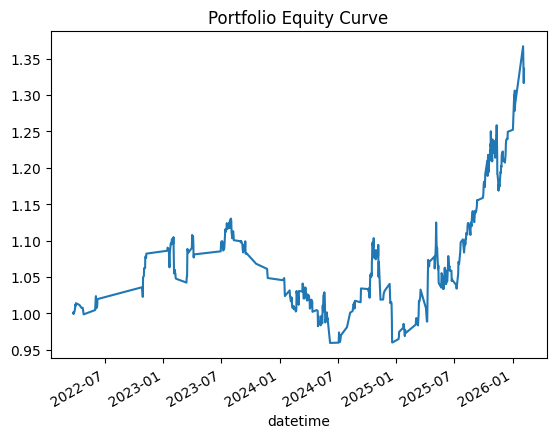

In [38]:
# สมมติผลลัพธ์จาก Sector Scan หรือ Stock Scan ของนาย
# 1. หารายชื่อตัวที่คะแนนสูงสุดในแต่ละวัน
def calculate_portfolio_return(all_data):
    # เลือกตัวที่ Signal=1 และมี Final_Score สูงสุด 3 อันดับแรกในแต่ละวัน
    top_assets = all_data[all_data['signal'] == 1].groupby(level=0).apply(
        lambda x: x.nlargest(1, 'Final_Score')
    )
    print(top_assets['symbol'])
    # 2. หาค่าเฉลี่ย Daily Return ของตัวท็อปเหล่านั้น
    # (เปรียบเสมือนเราแบ่งเงินลงทุนเท่าๆ กันในตัวที่เก่งที่สุด)
    portfolio_daily_return = top_assets.groupby(level=0)['daily_return'].mean()
    print(portfolio_daily_return)
    
    # 3. ทำ Cumulative Return
    system_equity_curve = (1 + portfolio_daily_return).cumprod()
    
    return system_equity_curve

portfolio_curve = calculate_portfolio_return(country_res)
portfolio_curve.plot(title="Portfolio Equity Curve")

datetime             datetime           
2022-03-23 09:00:00  2022-03-23 09:00:00         SET:SET
2022-03-24 09:00:00  2022-03-24 09:00:00         SET:SET
2022-03-25 09:00:00  2022-03-25 09:00:00         SET:SET
2022-03-28 09:00:00  2022-03-28 09:00:00         SET:SET
2022-03-29 09:00:00  2022-03-29 09:00:00         SET:SET
                                                ...     
2026-01-09 05:00:00  2026-01-09 05:00:00    OANDA:XAUUSD
2026-01-09 09:00:00  2026-01-09 09:00:00         SET:SET
2026-02-03 05:00:00  2026-02-03 05:00:00    OANDA:XAUUSD
2026-02-05 05:00:00  2026-02-05 05:00:00    OANDA:XAUUSD
2026-02-06 05:00:00  2026-02-06 05:00:00    OANDA:XAUUSD
Name: symbol, Length: 487, dtype: object
datetime
2022-03-23 09:00:00    0.000048
2022-03-24 09:00:00    0.001752
2022-03-25 09:00:00   -0.002433
2022-03-28 09:00:00    0.004473
2022-03-29 09:00:00    0.003230
                         ...   
2026-01-09 05:00:00    0.007168
2026-01-09 09:00:00    0.000391
2026-02-03 05:00:00    0.0

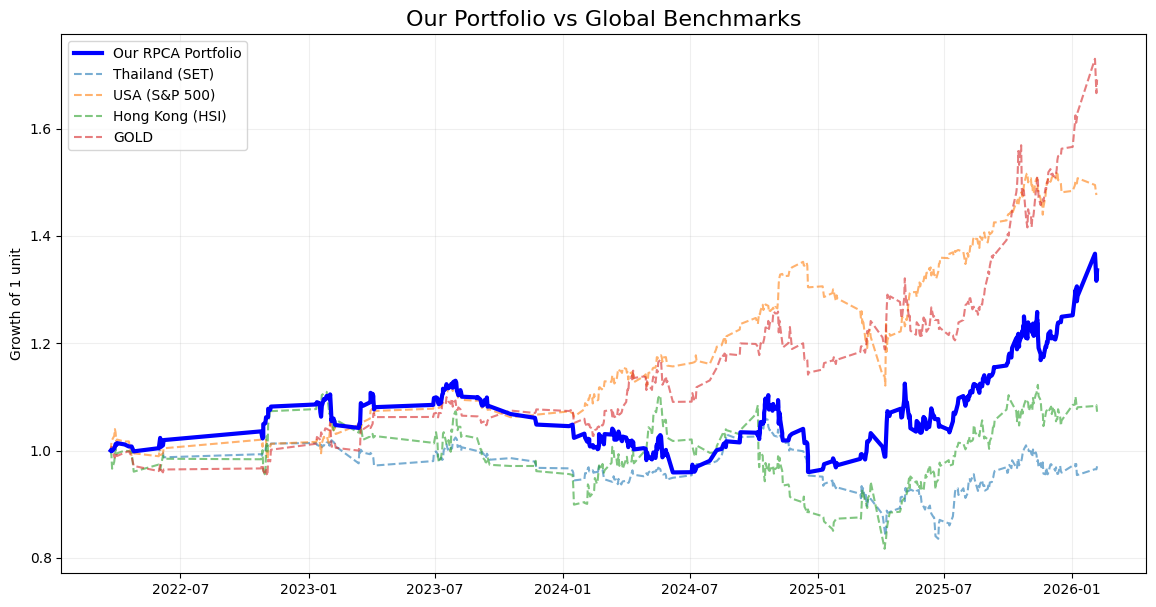


🏆 สรุปผลการวัดประสิทธิภาพ:
⭐ Our RPCA Strategy: 33.59%
⚪ Thailand (SET): -2.93%
⚪ USA (S&P 500): 47.62%
⚪ Hong Kong (HSI): 7.23%
⚪ GOLD: 69.12%


In [39]:
import matplotlib.pyplot as plt

def compare_all_markets(portfolio_curve):
    # 1. กำหนดดัชนีอ้างอิงของแต่ละประเทศ
    benchmarks = {
        "Thailand (SET)": "SET:SET",
        "USA (S&P 500)": "AMEX:SPY",
        "Hong Kong (HSI)": "HSI:HSI",
        "GOLD": "OANDA:XAUUSD"
    }
    
    # เตรียมพล็อต
    plt.figure(figsize=(14, 7))
    
    # ปรับ Format วันที่ของ Portfolio ให้เป็น Date เท่านั้น
    portfolio_curve.index = pd.to_datetime(portfolio_curve.index).date
    portfolio_curve = portfolio_curve / portfolio_curve.iloc[0] # ปรับเริ่มที่ 1
    
    plt.plot(portfolio_curve, label='Our RPCA Portfolio', linewidth=3, color='blue', zorder=5)
    
    summary_results = []
    
    # 2. วนลูปดึงข้อมูลดัชนีแต่ละตัวมาเทียบ
    for name, symbol in benchmarks.items():
        print(f"--- 🔄 กำลังดึงข้อมูล {name} ({symbol}) ---")
        bench_data = fetch_tvdatafeed(symbol)
        
        if bench_data is not None and not bench_data.empty:
            # คำนวณ Daily Return และปรับ Index
            bench_data['daily_return'] = bench_data['close'].pct_change()
            print(bench_data['daily_return'])
            bench_data.index = pd.to_datetime(bench_data.index).date
            
            # หาจุดตัดของวันที่ (เพื่อให้เริ่มและจบพร้อมกับพอร์ตเรา)
            common_dates = portfolio_curve.index.intersection(bench_data.index)
            
            if len(common_dates) > 0:
                # คำนวณผลตอบแทนสะสมในช่วงเวลาที่ตรงกัน
                bench_curve = (1 + bench_data.loc[common_dates, 'daily_return'].fillna(0)).cumprod()
                
                # Rebase ให้เริ่มที่ 1 เพื่อความยุติธรรม
                bench_curve = bench_curve / bench_curve.iloc[0]
                
                plt.plot(bench_curve, label=name, alpha=0.6, linestyle='--')
                
                # เก็บผลสรุป
                final_ret = (bench_curve.iloc[-1] - 1) * 100
                summary_results.append(f"⚪ {name}: {final_ret:.2f}%")
            else:
                print(f"⚠️ {name} ไม่มีวันที่ตรงกับพอร์ตในช่วงนี้")
        else:
            print(f"❌ ไม่สามารถดึงข้อมูล {name} ได้")

    # 3. ปรับแต่งกราฟ
    plt.title('Our Portfolio vs Global Benchmarks', fontsize=16)
    plt.ylabel('Growth of 1 unit')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.2)
    plt.show()
    
    # 4. พิมพ์สรุปผล
    print("\n" + "="*30)
    print("🏆 สรุปผลการวัดประสิทธิภาพ:")
    port_ret = (portfolio_curve.iloc[-1] - 1) * 100
    print(f"⭐ Our RPCA Strategy: {port_ret:.2f}%")
    for res in summary_results:
        print(res)
    print("="*30)

# --- วิธีรัน ---
# 1. คำนวณเส้นพอร์ต
portfolio_curve = calculate_portfolio_return(country_res)

# 2. รันเทียบทุกลูก
compare_all_markets(portfolio_curve)


📊 สรุปผลตอบแทนพอร์ตรายปี (RPCA Strategy)
      Return (%)
2022    4.526442
2023    0.797956
2024   46.680977
2025   75.103244
2026   13.779664


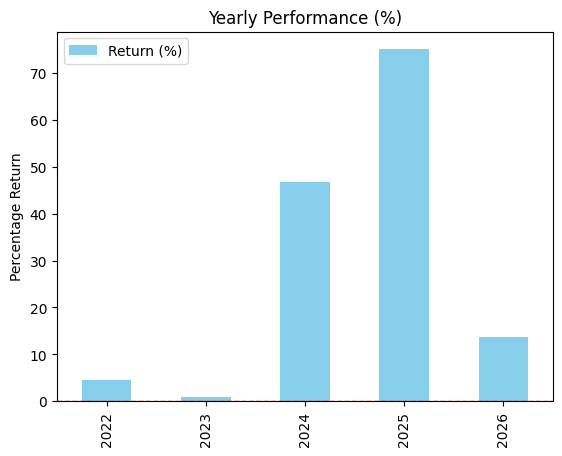

In [181]:
def show_yearly_summary(portfolio_curve):
    # เปลี่ยน Index ให้เป็น Datetime ก่อน (ถ้ายังไม่เป็น)
    df_curve = portfolio_curve.to_frame(name='equity')
    df_curve.index = pd.to_datetime(df_curve.index)
    
    # 1. คำนวณหา % Return รายปี
    # ใช้ค่าสุดท้ายของปี หารด้วยค่าสุดท้ายของปีที่แล้ว
    yearly_ret = df_curve['equity'].resample('YE').last().pct_change()
    
    # สำหรับปีแรก ให้คำนวณจากจุดเริ่มต้นของข้อมูล
    first_year_val = df_curve['equity'].resample('YE').last().iloc[0]
    start_val = df_curve['equity'].iloc[0]
    yearly_ret.iloc[0] = (first_year_val / start_val) - 1
    
    # แปลงเป็นเปอร์เซ็นต์
    yearly_summary = (yearly_ret * 100).to_frame(name='Return (%)')
    yearly_summary.index = yearly_summary.index.year # แสดงเฉพาะเลขปี
    
    print("\n" + "="*30)
    print("📊 สรุปผลตอบแทนพอร์ตรายปี (RPCA Strategy)")
    print(yearly_summary)
    print("="*30)
    
    # พล็อตกราฟแท่งเปรียบเทียบแต่ละปี
    yearly_summary.plot(kind='bar', color='skyblue', title='Yearly Performance (%)')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.ylabel('Percentage Return')
    plt.show()

# --- วิธีรัน ---
# หลังจากได้ portfolio_curve จาก calculate_portfolio_return แล้ว
show_yearly_summary(portfolio_curve)